In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from plotly import express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('CreditCardData.csv')

In [3]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data_original = data.copy()

In [5]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
pd.cut(data["Credit_Limit"],4)

0        (9707.725, 17977.15]
1        (1405.222, 9707.725]
2        (1405.222, 9707.725]
3        (1405.222, 9707.725]
4        (1405.222, 9707.725]
                 ...         
10122    (1405.222, 9707.725]
10123    (1405.222, 9707.725]
10124    (1405.222, 9707.725]
10125    (1405.222, 9707.725]
10126    (9707.725, 17977.15]
Name: Credit_Limit, Length: 10127, dtype: category
Categories (4, interval[float64, right]): [(1405.222, 9707.725] < (9707.725, 17977.15] < (17977.15, 26246.575] < (26246.575, 34516.0]]

In [7]:
pd.cut(data["Avg_Utilization_Ratio"],4)

0        (-0.000999, 0.25]
1        (-0.000999, 0.25]
2        (-0.000999, 0.25]
3           (0.749, 0.999]
4        (-0.000999, 0.25]
               ...        
10122          (0.25, 0.5]
10123         (0.5, 0.749]
10124    (-0.000999, 0.25]
10125    (-0.000999, 0.25]
10126    (-0.000999, 0.25]
Name: Avg_Utilization_Ratio, Length: 10127, dtype: category
Categories (4, interval[float64, right]): [(-0.000999, 0.25] < (0.25, 0.5] < (0.5, 0.749] < (0.749, 0.999]]

In [8]:
# Credit Limit Scoring Function
def credit_limit_score_v2(credit_limit):
    if credit_limit > 20000:
        return 3
    elif credit_limit > 10000:
        return 2
    elif credit_limit > 5000:
        return 1
    else:
        return 0

# Avg Utilization Ratio Scoring Function
def utilization_score_v2(utilization):
    if utilization < 0.1:
        return 3
    elif utilization < 0.3:
        return 2
    elif utilization < 0.5:
        return 1
    else:
        return 0

# Income Category Scoring Function
def income_score_v2(income):
    if income == '$120K +':
        return 3
    elif income in ['$80K - $120K', '$60K - $80K']:
        return 2
    elif income == '$40K - $60K':
        return 1
    elif income == 'Less than $40K':
        return 0
    else:  # Handling 'Unknown'
        return 1.5

# Applying the scoring functions to each customer
data['Credit_Limit_Score'] = data['Credit_Limit'].apply(credit_limit_score_v2)
data['Utilization_Score'] = data['Avg_Utilization_Ratio'].apply(utilization_score_v2)
data['Income_Score'] = data['Income_Category'].apply(income_score_v2)

# Calculating the total score
data['Total_Score_V2'] = data[['Credit_Limit_Score', 'Utilization_Score', 'Income_Score']].sum(axis=1)

# Categorizing based on the total score
def categorize_customer_v2(score):
    if score >= 8:
        return 'Super-Prime'
    elif score >= 6:
        return 'Prime'
    elif score >= 3:
        return 'Near-Prime'
    else:
        return 'Subprime'

data['Customer_Category'] = data['Total_Score_V2'].apply(categorize_customer_v2)

# Checking the distribution of the new categories
category_distribution_v2 = data['Customer_Category'].value_counts()
category_distribution_v2


Near-Prime     3839
Subprime       3579
Prime          1539
Super-Prime    1170
Name: Customer_Category, dtype: int64

In [9]:
data['Customer_Category'].value_counts()

Near-Prime     3839
Subprime       3579
Prime          1539
Super-Prime    1170
Name: Customer_Category, dtype: int64

In [10]:
# calculate interest rate for each customer based on customer category
# https://www.forbes.com/advisor/credit-cards/average-credit-card-interest-rate/

def Calc_interest_rate(Customer_Category):
    if Customer_Category == 'Super-Prime':
        return 0.18/12
    elif Customer_Category == 'Prime':
        return 0.22/12
    elif Customer_Category == 'Near-Prime':
        return 0.24/12
    else:
        return 0.28/12

In [11]:
data["Interest_Rate_monthly"] = data["Customer_Category"].apply(Calc_interest_rate)

In [12]:
# calculate annual fee for each customer 
def Calc_monthly_fee(Card_Category):
    if Card_Category == 'Blue':
        return 0
    elif Card_Category == 'Silver':
        return 150/12
    elif Card_Category == 'Gold':
        return 450/12
    else:
        return 695/12

In [13]:
data["Card_Fee_Monthly"] = data["Card_Category"].apply(Calc_monthly_fee)

In [14]:
data["Card_Fee_Monthly"].dtype

dtype('float64')

In [15]:
#Late Fee for each customer
# https://www.cnbc.com/select/why-deep-subprime-borrowers-incur-more-interest/
def Calc_Late_Fee(Customer_Category):
    if Customer_Category == 'Super-Prime':
        return 1323/38
    elif Customer_Category == 'Prime':
        return 1983/41
    elif Customer_Category == 'Near-Prime':
        return 2407/44
    else:
        return 2676/45

In [16]:
data["Late_Fee_Monthly"] = data["Customer_Category"].apply(Calc_Late_Fee)

In [17]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,2,3,2.0,7.0,Prime,0.018333,0.0,48.365854
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,1,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0,0,0.0,0.0,Subprime,0.023333,0.0,59.466667
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545


In [18]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

### Deliverable 1 What is the current monthly gross revenue per customer. 

<h4> Monthly Revenue = Monthly Interest + Monthly Fee on card + Late Fee

In [19]:
#calculate Revenue
data["Monthy_Revenue"] = (data["Interest_Rate_monthly"] * data["Total_Revolving_Bal"]) + data["Card_Fee_Monthly"] + data["Late_Fee_Monthly"]


In [20]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthy_Revenue
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.061,2,3,2.0,7.0,Prime,0.018333,0.0,48.365854,62.610854
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.105,1,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.760,0,0,0.0,0.0,Subprime,0.023333,0.0,59.466667,118.196667
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545


<h4>Random Forest Classification

In [21]:
# Encode the target variable 'Attrited_Flag'
encoder = LabelEncoder()
data_original['Attrition_Flag'] = encoder.fit_transform(data_original['Attrition_Flag'])


In [22]:
#making a current copy of the data before we start feature engineering
df=data.copy()

In [23]:
data_original['Attrition_Flag'] = encoder.fit_transform(data_original['Attrition_Flag'])
data_original["Education_Level"] = encoder.fit_transform(data_original['Education_Level'])
data_original["Gender"] = encoder.fit_transform(data_original["Gender"])
data_original["Marital_Status"] = encoder.fit_transform(data_original["Marital_Status"])
data_original['Income_Category'] = encoder.fit_transform(data_original['Income_Category'])
data_original['Card_Category'] = encoder.fit_transform(data_original['Card_Category'])

In [24]:
# Prepare the features (X) and the target (y)
X = data_original.drop(['Attrition_Flag','CLIENTNUM'], axis=1)  # Drop other non-feature columns as necessary
y = data_original['Attrition_Flag']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [29]:
y_pred = pd.DataFrame(y_pred)

In [30]:
y_pred.value_counts()

1    2602
0     437
dtype: int64

In [31]:
y_pred_proba = pd.DataFrame(y_pred_proba)


In [32]:
for x,y in zip(X.columns, rf_model.feature_importances_):
    print(f"{x} : {y}")

Customer_Age : 0.03485902915010776
Gender : 0.010269691439715407
Dependent_count : 0.011994326975582904
Education_Level : 0.011858040420624109
Marital_Status : 0.008492815014359459
Income_Category : 0.011066594700203554
Card_Category : 0.0019880482951178243
Months_on_book : 0.024660619740520973
Total_Relationship_Count : 0.06121062793646481
Months_Inactive_12_mon : 0.023908121867380887
Contacts_Count_12_mon : 0.025352444763242426
Credit_Limit : 0.031887215336774494
Total_Revolving_Bal : 0.10547388056126127
Avg_Open_To_Buy : 0.031303617622418484
Total_Amt_Chng_Q4_Q1 : 0.05958010936443484
Total_Trans_Amt : 0.19994577653140175
Total_Trans_Ct : 0.1719175759313364
Total_Ct_Chng_Q4_Q1 : 0.10857358817655453
Avg_Utilization_Ratio : 0.06565787617249817


In [33]:
import seaborn as sns

# Assuming 'X' is your feature DataFrame and 'rf_model' is your trained random forest model

# Step 1: Prepare the Data
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})

# Step 2: Sort the Data
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 3: Plot the Chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9608423823626193
ROC-AUC: 0.989981194423655


In [36]:
# Get probability predictions for all instances
probabilities = rf_model.predict_proba(X)
probabilities = pd.DataFrame(probabilities)

In [37]:
data_new = pd.concat((data_original,probabilities[1]),axis=1)

In [301]:
#convert data to csv file
#data_new.to_csv('survival.csv', index=False)

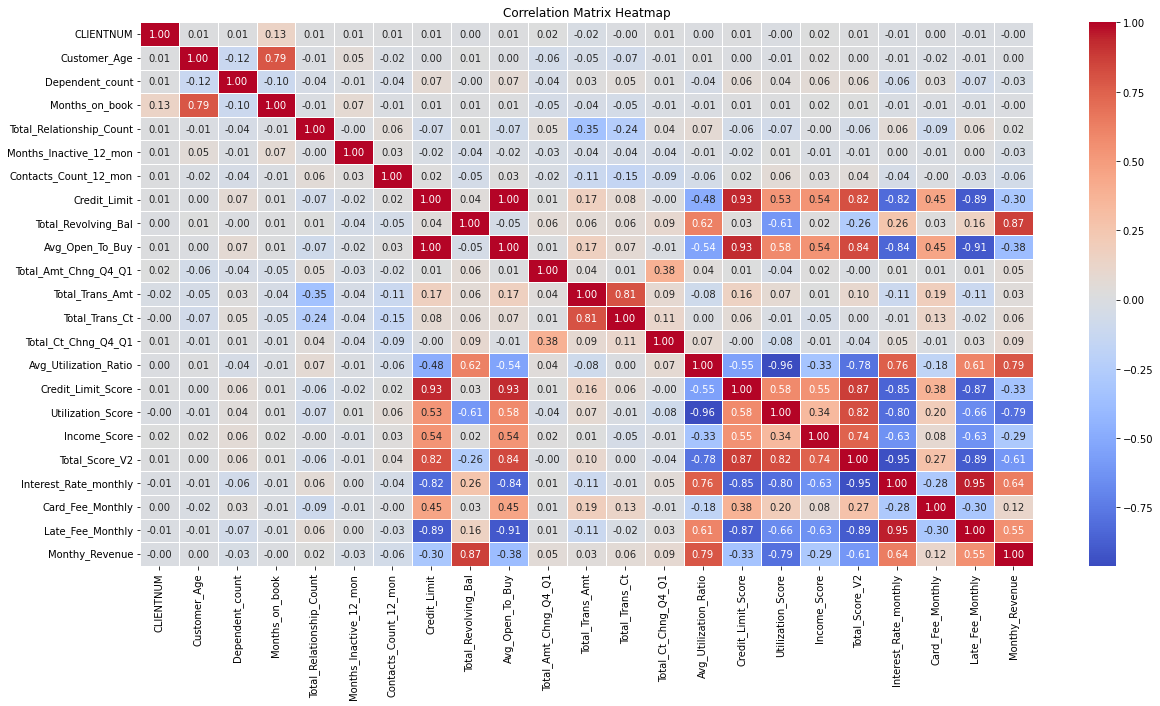

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
data_new.rename(columns={1: 'Attrition_Probability'}, inplace=True)

In [41]:
df['Adjusted Monthly_Revenue']=df['Monthy_Revenue']*data_new['Attrition_Probability']
df['Attrition_Probability']=data_new['Attrition_Probability']

In [42]:
df.rename(columns={'Monthy_Revenue':'Monthly_Revenue'},inplace=True)

In [43]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthly_Revenue,Adjusted Monthly_Revenue,Attrition_Probability
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,2.0,7.0,Prime,0.018333,0.0,48.365854,62.610854,62.610854,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545,71.264700,0.99
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,47.592955,0.87
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0.0,0.0,Subprime,0.023333,0.0,59.466667,118.196667,105.195033,0.89
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,46.498864,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1,1.0,2.0,Subprime,0.023333,0.0,59.466667,102.656667,102.656667,1.00
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,1.0,1.0,Subprime,0.023333,0.0,59.466667,110.473333,76.226600,0.69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,0.0,4.0,Near-Prime,0.020000,0.0,54.704545,54.704545,1.641136,0.03
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,1.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,14.223182,0.26


<h4>Profiling our customers

<h5>1) percentage of customers in each catergory

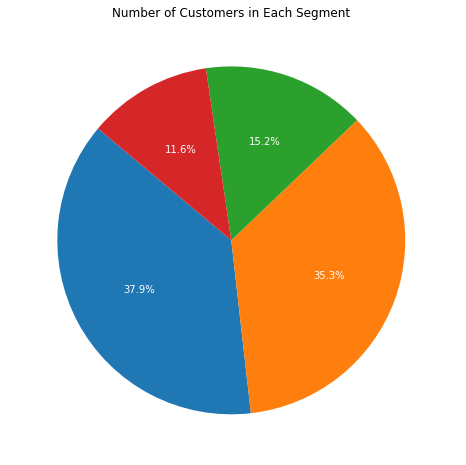

In [44]:
segment_counts = df['Customer_Category'].value_counts()

textprops = {'color': 'white'}
# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, textprops=textprops)
plt.title('Number of Customers in Each Segment')
plt.show()

<h5>2) Total Monthly Revenue from each customer category

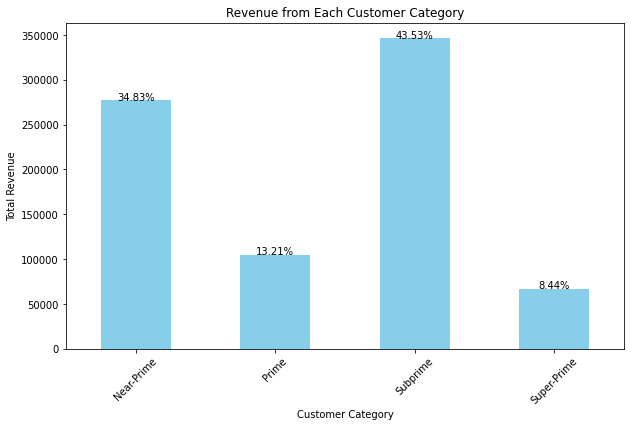

In [45]:
# Aggregating revenue by customer category
revenue_by_category = df.groupby('Customer_Category')['Monthly_Revenue'].sum()

# Calculate total revenue for percentage calculation
total_revenue = revenue_by_category.sum()

# Plotting the bar chart
ax = revenue_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Revenue from Each Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate labels to make them readable

# Annotating each bar with the percentage of the total revenue it represents
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    percentage = f'{(height/total_revenue)*100:.2f}%'
    ax.annotate(percentage, (x + width/2, y + height), ha='center')

plt.show()

<h4>SubPrime and Near-Prime category customers have highest contribution to the Revenue.Total contribution = 80%

<h4>Who are the customers with high attrition rate?(50%)

 <h5>3) Customer category and monthly revenue from customers with high attrition Probabilty(>0.5)

In [46]:
df["Churn_Rate"] = 1-df["Attrition_Probability"]
high_attrition_df = df[df['Churn_Rate'] > 0.5]

In [47]:
# Counting the number of customers with a churn rate > 0.5
num_high_churn_customers = high_attrition_df.shape[0]

# Total number of customers in the original dataset
total_customers = df.shape[0]

# Calculating the proportion of customers with a high churn rate
proportion_high_churn = num_high_churn_customers / total_customers

print(f"Number of customers with churn rate > 0.5: {num_high_churn_customers}")
print(f"Total number of customers: {total_customers}")
print(f"Proportion of customers with churn rate > 0.5: {proportion_high_churn:.2%}")

Number of customers with churn rate > 0.5: 1559
Total number of customers: 10127
Proportion of customers with churn rate > 0.5: 15.39%


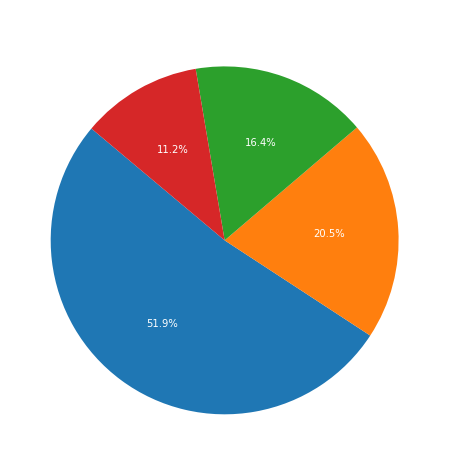

In [48]:
# Counting the number of customers in each category within the high-risk group
category_counts = high_attrition_df['Customer_Category'].value_counts()

# Calculating the percentage of customers in each category
category_percentages = category_counts / category_counts.sum() * 100

# Setting text properties for white color
textprops = {"color": "white"}

# Plotting the pie chart with white labels
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140, textprops=textprops)
plt.title('Customer Categories Among High-Attrition Customers', color='white')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Near-Prime'),
  Text(1, 0, 'Prime'),
  Text(2, 0, 'Subprime'),
  Text(3, 0, 'Super-Prime')])

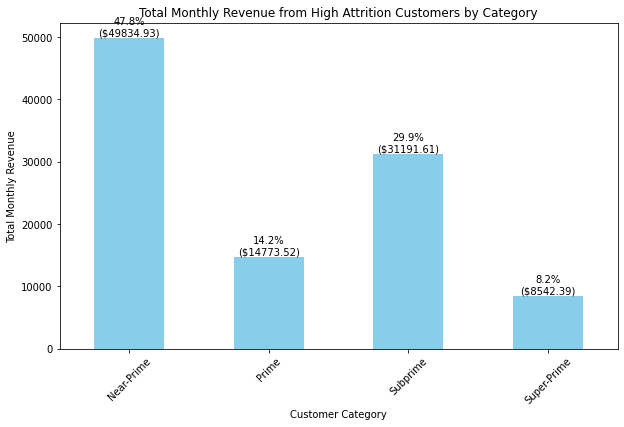

In [49]:
# Step 1: Calculate total monthly revenue by category
monthly_revenue_by_category = high_attrition_df.groupby('Customer_Category')['Monthly_Revenue'].sum()

# Step 2: Calculate total revenue for normalization
total_revenue = monthly_revenue_by_category.sum()

# Step 3: Calculate percentage contribution of each category
percentage_contribution = (monthly_revenue_by_category / total_revenue) * 100

# Step 4: Plot bar chart
ax = monthly_revenue_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Monthly Revenue from High Attrition Customers by Category')
plt.xlabel('Customer Category')
plt.ylabel('Total Monthly Revenue')

# Step 5: Annotate bars with percentage
for i, value in enumerate(monthly_revenue_by_category):
    pct = percentage_contribution[i]
    ax.text(i, value, f'{pct:.1f}%\n(${value:.2f})', ha='center', va='bottom')

plt.xticks(rotation=45)  

About $100,000 of Montly Revenue from Customers with high attrition probability. 80% of the revenue is from Near-Prime and Subprime.

4) what income category do these customers with high attrition belong to?

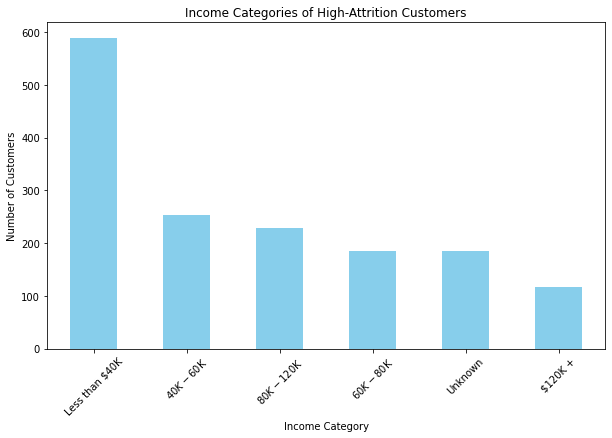

In [50]:
# Count the number of high-attrition customers in each income category
income_category_counts = high_attrition_df['Income_Category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
income_category_counts.plot(kind='bar', color='skyblue')
plt.title('Income Categories of High-Attrition Customers')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate the category names for better readability
plt.show()

In [51]:

# Sum up the monthly revenue and adjusted monthly revenue
total_monthly_revenue = df['Monthly_Revenue'].sum()
total_adjusted_monthly_revenue = df['Adjusted Monthly_Revenue'].sum()

# Calculate the loss in monthly revenue
loss_in_monthly_revenue = total_monthly_revenue - total_adjusted_monthly_revenue

# Create a DataFrame with the total revenue data
total_revenue_df = pd.DataFrame({'Revenue Type': ['Monthly Revenue', 'Adjusted Monthly Revenue'],
                                 'Total Revenue': [total_monthly_revenue, total_adjusted_monthly_revenue]})

# Create a bar chart
fig = px.bar(total_revenue_df, x='Revenue Type', y='Total Revenue', title=f'Our Model Predicts A Loss of ${loss_in_monthly_revenue:,.0f} in Monthly Revenue',
             labels={'Total Revenue': 'Total Revenue', 'Revenue Type': 'Revenue Type'},
             width=700,  # Adjust the width of the plot
             color='Revenue Type',  # Color the bars based on the revenue type
            )

# Update the appearance of the bars
fig.update_traces(marker_line_width=1.5,  # Set the width of the marker outline
                  marker_line_color='rgb(8, 48, 107)',  # Set the color of the marker outline
                  opacity=0.8  # Set the opacity of the bars
                 )

# Update layout
fig.update_layout(xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                  yaxis_title='Total Revenue',  # Set y-axis title
                  font=dict(family="Arial", size=12, color="black"),  # Set font properties
                  plot_bgcolor='white',  # Set plot background color
                  title_font=dict(size=20)  # Set title font size
                 )

# Show the figure
fig.show()


In [52]:
# Histogram of attrition probability
fig = px.histogram(data_new, x='Attrition_Probability', title='Attrition Probability Distribution', nbins=5)
fig.show()

<h5>CLV = Monthly_Revenue * Years with the company

In [53]:
# Calculate CLV
df['CLV'] = df['Monthly_Revenue'] * (df['Months_on_book'] / 12)
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthly_Revenue,Adjusted Monthly_Revenue,Attrition_Probability,Churn_Rate,CLV
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,7.0,Prime,0.018333,0.0,48.365854,62.610854,62.610854,1.00,0.00,203.485274
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545,71.264700,0.99,0.01,263.943333
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,47.592955,0.87,0.13,164.113636
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.0,Subprime,0.023333,0.0,59.466667,118.196667,105.195033,0.89,0.11,334.890556
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,46.498864,0.85,0.15,95.732955


1. 0-25% CLV - Low value Customers
2. 25%-50% CLV - Medium value customers
3. 50%-75% CLV - High value customers
4. 75% - 100% CLV - very high value customers


In [54]:
# Dividing customers into quartiles based on their CLV Revenue
df['Revenue_Group'] = pd.qcut(df['CLV'], q=4, labels=['Low Value', 'Medium Value', 'High Value', 'Very High Value'])

# If you want to see how many customers fall into each group
df['Revenue_Group'].value_counts()

Low Value          2532
Medium Value       2532
Very High Value    2532
High Value         2531
Name: Revenue_Group, dtype: int64

<h5>Customer profile based on CLV

<h5>Income Category of Different Customer Groups

In [55]:
# Grouping by 'Revenue_Group', then looking at the distribution of 'Income_Category' within each group
income_distribution_by_revenue_group= df.groupby('Revenue_Group')['Income_Category'].value_counts(normalize=True).unstack(fill_value=0)

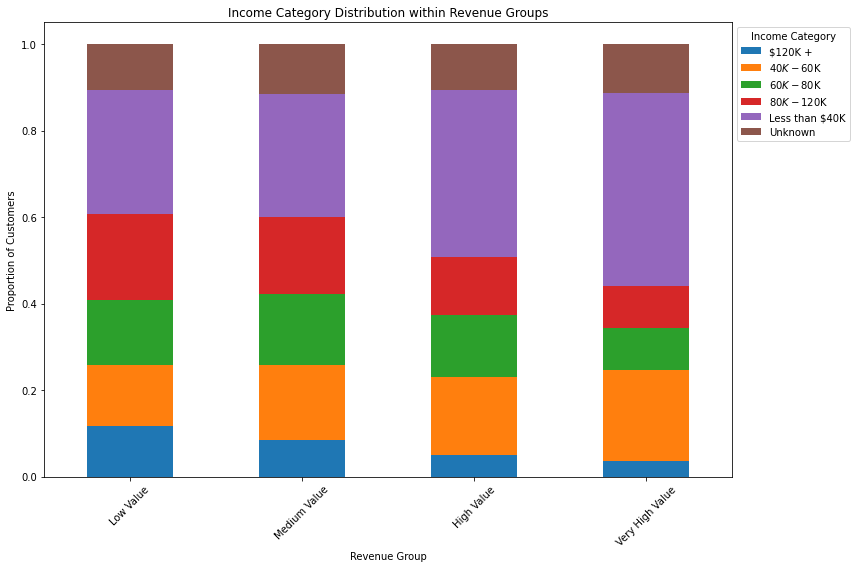

In [319]:
# Plotting the stacked bar chart
income_distribution_by_revenue_group.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Income Category Distribution within Revenue Groups')
plt.xlabel('Revenue Group')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Moving the legend outside the plot area
plt.legend(title='Income Category', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

<h5>Age Categories of different customer groups

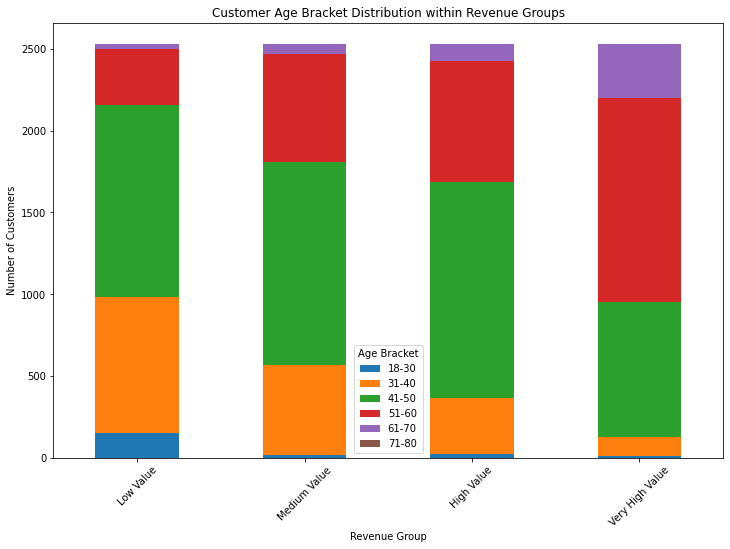

In [320]:
# Step 1: Define Age Brackets
age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Step 2: Categorize Customers into Age Brackets
df['Age_Bracket'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Group by Revenue Group and Age Bracket
age_distribution_by_revenue_group = df.groupby(['Revenue_Group', 'Age_Bracket']).size().unstack(fill_value=0)

# Step 4: Plot
age_distribution_by_revenue_group.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Customer Age Bracket Distribution within Revenue Groups')
plt.xlabel('Revenue Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Age Bracket')
plt.show()

<h5> Gender distribution of each cusomer groups

In [321]:
# Grouping by Revenue_Group and then counting genders within each group
gender_counts_by_revenue_group = df.groupby('Revenue_Group')['Gender'].value_counts().unstack(fill_value=0)

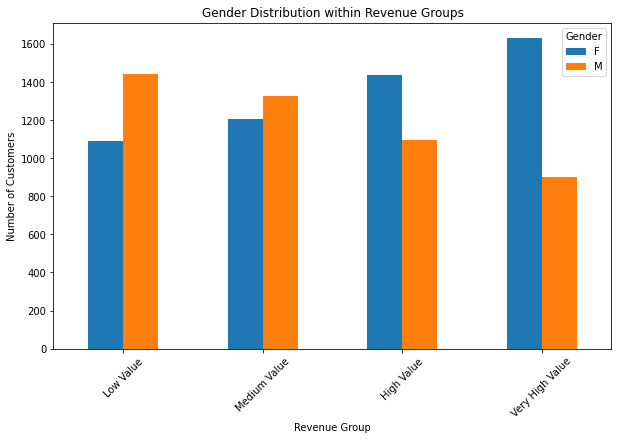

In [322]:
# Plotting the grouped bar chart
gender_counts_by_revenue_group.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Distribution within Revenue Groups')
plt.xlabel('Revenue Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

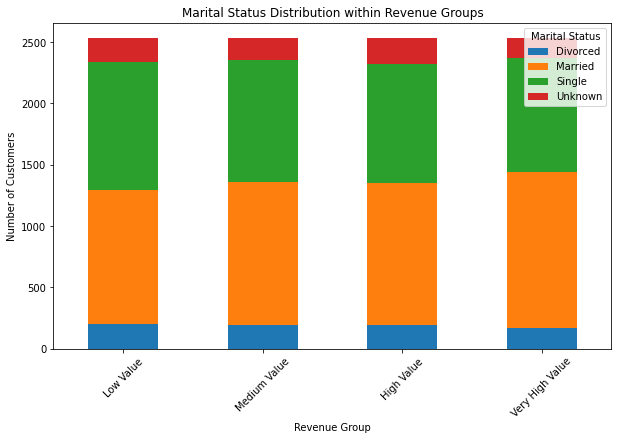

In [323]:
# Step 1: Group by Revenue_Group and count Marital_Status within each group
marital_status_counts = df.groupby('Revenue_Group')['Marital_Status'].value_counts().unstack(fill_value=0)

# Step 2: Plotting a stacked bar chart
marital_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status Distribution within Revenue Groups')
plt.xlabel('Revenue Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Marital Status')
plt.show()